# Covid-19 Analysis

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading file
df= pd.read_excel('CovidDeaths.xlsx')
pd.set_option('display.max.column',100)

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


# Data cleaning

In [4]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [5]:
#removing unnecessary columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [6]:
#selecting necessaary columns
df1= df[['continent', 'location', 'date', 'total_cases', 'new_cases',
        'total_deaths', 'new_deaths','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations','population', 'population_density']].copy()

In [7]:
df1

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Africa,Zimbabwe,2021-04-26,38102.0,16.0,1560.0,3.0,411610.0,353834.0,57776.0,21592.0,14862927.0,42.729
85167,Africa,Zimbabwe,2021-04-27,38164.0,62.0,1565.0,5.0,433939.0,370676.0,63263.0,22329.0,14862927.0,42.729
85168,Africa,Zimbabwe,2021-04-28,38191.0,27.0,1565.0,0.0,458013.0,388021.0,69992.0,24074.0,14862927.0,42.729
85169,Africa,Zimbabwe,2021-04-29,38235.0,44.0,1567.0,2.0,477597.0,400771.0,76826.0,19584.0,14862927.0,42.729


In [8]:
#cheching datatypes
df1.dtypes

continent                          object
location                           object
date                       datetime64[ns]
total_cases                       float64
new_cases                         float64
total_deaths                      float64
new_deaths                        float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
new_vaccinations                  float64
population                        float64
population_density                float64
dtype: object

In [9]:
df1.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422


In [10]:
#Statistical summary
df1.describe()

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density
count,85171,8.307200e+04,83070.000000,7.340800e+04,73566.000000,9.374000e+03,8.744000e+03,6.431000e+03,7.954000e+03,8.462200e+04,79274.000000
mean,2020-10-02 18:15:29.978513920,8.250083e+05,5808.325352,2.300409e+04,139.052606,1.448260e+07,8.974136e+06,4.618760e+06,4.223566e+05,1.284213e+08,349.043245
min,2020-01-01 00:00:00,1.000000e+00,-74347.000000,1.000000e+00,-1918.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.090000e+02,0.137000
25%,2020-06-18 00:00:00,9.300000e+02,2.000000,4.500000e+01,0.000000,6.206025e+04,5.225850e+04,2.580700e+04,3.219750e+03,2.416664e+06,36.253000
50%,2020-10-05 00:00:00,1.042250e+04,70.000000,3.150000e+02,2.000000,4.803760e+05,3.548135e+05,2.178900e+05,1.943150e+04,1.009927e+07,82.805000
75%,2021-01-21 00:00:00,1.105940e+05,764.000000,3.045000e+03,18.000000,2.997519e+06,2.108087e+06,1.320154e+06,1.117732e+05,3.691056e+07,208.354000
max,2021-04-30 00:00:00,1.513995e+08,905992.000000,3.180238e+06,17906.000000,1.134333e+09,5.952349e+08,2.680025e+08,2.462373e+07,7.794799e+09,20546.766000
std,NaN,5.705959e+06,36285.123205,1.360297e+05,758.882229,6.637651e+07,3.793750e+07,1.819767e+07,1.691168e+06,6.904393e+08,1699.215916


In [11]:
df1['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [12]:
#removing null values
df2=df1.query('continent.isna() == False')

In [13]:
df2

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Africa,Zimbabwe,2021-04-26,38102.0,16.0,1560.0,3.0,411610.0,353834.0,57776.0,21592.0,14862927.0,42.729
85167,Africa,Zimbabwe,2021-04-27,38164.0,62.0,1565.0,5.0,433939.0,370676.0,63263.0,22329.0,14862927.0,42.729
85168,Africa,Zimbabwe,2021-04-28,38191.0,27.0,1565.0,0.0,458013.0,388021.0,69992.0,24074.0,14862927.0,42.729
85169,Africa,Zimbabwe,2021-04-29,38235.0,44.0,1567.0,2.0,477597.0,400771.0,76826.0,19584.0,14862927.0,42.729


In [14]:
df2['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [15]:
#Sorting the dataframe
df2=df2.sort_values(by=['location','date'], ascending=[True,True])

In [16]:
df2

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Africa,Zimbabwe,2021-04-26,38102.0,16.0,1560.0,3.0,411610.0,353834.0,57776.0,21592.0,14862927.0,42.729
85167,Africa,Zimbabwe,2021-04-27,38164.0,62.0,1565.0,5.0,433939.0,370676.0,63263.0,22329.0,14862927.0,42.729
85168,Africa,Zimbabwe,2021-04-28,38191.0,27.0,1565.0,0.0,458013.0,388021.0,69992.0,24074.0,14862927.0,42.729
85169,Africa,Zimbabwe,2021-04-29,38235.0,44.0,1567.0,2.0,477597.0,400771.0,76826.0,19584.0,14862927.0,42.729


# Analysis

In [17]:
# Time duration of the data 
df2['date'].max()- df2['date'].min()

Timedelta('485 days 00:00:00')

In [18]:
#deaths per cases each day in nigeria
df2['death_percent']=(df2['total_deaths'] / df2['total_cases']) *100

In [19]:
df2[['location','date','total_cases','total_deaths','death_percent']].query('location == "Nigeria"').rename(columns={'death_percent':'death_pct_nig'}).head(30)

,location,date,total_cases,total_deaths,death_pct_nig
55626,Nigeria,2020-02-28,1.0,NaN,NaN
55627,Nigeria,2020-02-29,1.0,NaN,NaN
55628,Nigeria,2020-03-01,1.0,NaN,NaN
55629,Nigeria,2020-03-02,1.0,NaN,NaN
55630,Nigeria,2020-03-03,1.0,NaN,NaN
55631,Nigeria,2020-03-04,1.0,NaN,NaN
55632,Nigeria,2020-03-05,1.0,NaN,NaN
55633,Nigeria,2020-03-06,1.0,NaN,NaN
55634,Nigeria,2020-03-07,1.0,NaN,NaN
55635,Nigeria,2020-03-08,1.0,NaN,NaN


In [20]:
#percentage population that has covid-19 each day in nigeria
df2['cases_population_percent']=(df2['total_cases'] / df2['population']) *100

In [21]:
df2[['location','date','total_cases','population','cases_population_percent']].query('location == "Nigeria"').head(30)

,location,date,total_cases,population,cases_population_percent
55626,Nigeria,2020-02-28,1.0,206139587.0,4.851082e-07
55627,Nigeria,2020-02-29,1.0,206139587.0,4.851082e-07
55628,Nigeria,2020-03-01,1.0,206139587.0,4.851082e-07
55629,Nigeria,2020-03-02,1.0,206139587.0,4.851082e-07
55630,Nigeria,2020-03-03,1.0,206139587.0,4.851082e-07
55631,Nigeria,2020-03-04,1.0,206139587.0,4.851082e-07
55632,Nigeria,2020-03-05,1.0,206139587.0,4.851082e-07
55633,Nigeria,2020-03-06,1.0,206139587.0,4.851082e-07
55634,Nigeria,2020-03-07,1.0,206139587.0,4.851082e-07
55635,Nigeria,2020-03-08,1.0,206139587.0,4.851082e-07


In [22]:
df2

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,death_percent,cases_population_percent
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Africa,Zimbabwe,2021-04-26,38102.0,16.0,1560.0,3.0,411610.0,353834.0,57776.0,21592.0,14862927.0,42.729,4.094273,0.256356
85167,Africa,Zimbabwe,2021-04-27,38164.0,62.0,1565.0,5.0,433939.0,370676.0,63263.0,22329.0,14862927.0,42.729,4.100723,0.256773
85168,Africa,Zimbabwe,2021-04-28,38191.0,27.0,1565.0,0.0,458013.0,388021.0,69992.0,24074.0,14862927.0,42.729,4.097824,0.256955
85169,Africa,Zimbabwe,2021-04-29,38235.0,44.0,1567.0,2.0,477597.0,400771.0,76826.0,19584.0,14862927.0,42.729,4.098339,0.257251


In [23]:
#looking at countries with the highest infection rate compared to population
loc_grp = df2.groupby('location')
df2.rename(columns={'cases_population_percent':'infection_rate'},inplace=True)
loc_grp[['total_cases','infection_rate']].max().sort_values(by='infection_rate',ascending=False)

,total_cases,infection_rate
location,,
Andorra,13232.0,17.125477
Montenegro,97389.0,15.506272
Czechia,1630758.0,15.227946
San Marino,5066.0,14.927220
Slovenia,240292.0,11.558435
...,...,...
Nauru,NaN,NaN
Northern Cyprus,NaN,NaN
Saint Helena,NaN,NaN


In [24]:
#country with the highest death count
loc_grp['total_deaths'].max().sort_values(ascending=False).head(10)

location
United States     576232.0
Brazil            403781.0
Mexico            216907.0
India             211853.0
United Kingdom    127775.0
Italy             120807.0
Russia            108290.0
France            104675.0
Germany            83097.0
Spain              78216.0
Name: total_deaths, dtype: float64

In [25]:
#continent with the highest death count
max_loc_pop=loc_grp.agg({'total_deaths':'max','continent':'first'})

In [26]:
max_loc_pop.groupby('continent')['total_deaths'].sum().sort_values(ascending=False)

continent
Europe           1016750.0
North America     847942.0
South America     672415.0
Asia              520286.0
Africa            121784.0
Oceania             1046.0
Name: total_deaths, dtype: float64

In [27]:
#total cases and total deaths globally per day
date_grp=df2.groupby('date')
global_df=date_grp[['new_cases','new_deaths']].sum()
global_df['death_percentage']= (global_df['new_deaths']/global_df['new_cases']) *100
global_df.head(30)

,new_cases,new_deaths,death_percentage
date,,,
2020-01-01,0.0,0.0,NaN
2020-01-02,0.0,0.0,NaN
2020-01-03,0.0,0.0,NaN
2020-01-04,0.0,0.0,NaN
2020-01-05,0.0,0.0,NaN
2020-01-06,0.0,0.0,NaN
2020-01-07,0.0,0.0,NaN
2020-01-08,0.0,0.0,NaN
2020-01-09,0.0,0.0,NaN


In [28]:
#Total cases, deaths and death percentage
total_global_df=global_df.agg({'new_cases':'sum','new_deaths':'sum'})
total_global_df['world_death_percentage']=total_global_df.loc['new_deaths']/total_global_df.loc['new_cases']
total_global_df

new_cases                 1.505750e+08
new_deaths                3.180206e+06
world_death_percentage    2.112041e-02
dtype: float64

In [29]:
df2.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,death_percent,infection_rate
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,0.000003


In [30]:
#Rolling sum of people vaccinated in nigeria per day
df2['new_vaccinations']=df2['new_vaccinations'].fillna(0)
df2['rolling_vaccinated']= df2.groupby('location')['new_vaccinations'].cumsum()
df2[['location','date','new_vaccinations','rolling_vaccinated']].query('location == "Nigeria"').tail(35)

,location,date,new_vaccinations,rolling_vaccinated
56019,Nigeria,2021-03-27,0.0,0.0
56020,Nigeria,2021-03-28,0.0,0.0
56021,Nigeria,2021-03-29,0.0,0.0
56022,Nigeria,2021-03-30,0.0,0.0
56023,Nigeria,2021-03-31,0.0,0.0
56024,Nigeria,2021-04-01,100453.0,100453.0
56025,Nigeria,2021-04-02,0.0,100453.0
56026,Nigeria,2021-04-03,0.0,100453.0
56027,Nigeria,2021-04-04,0.0,100453.0
56028,Nigeria,2021-04-05,0.0,100453.0


In [31]:
#percentage of the population vaccinated per day in nigeria
df2['pct_rolling_vaccinated'] = (df2['rolling_vaccinated']/df2['population']) *100
df2[['location','date','new_vaccinations','rolling_vaccinated','pct_rolling_vaccinated']].query('location == "Nigeria"').tail(35)

,location,date,new_vaccinations,rolling_vaccinated,pct_rolling_vaccinated
56019,Nigeria,2021-03-27,0.0,0.0,0.000000
56020,Nigeria,2021-03-28,0.0,0.0,0.000000
56021,Nigeria,2021-03-29,0.0,0.0,0.000000
56022,Nigeria,2021-03-30,0.0,0.0,0.000000
56023,Nigeria,2021-03-31,0.0,0.0,0.000000
56024,Nigeria,2021-04-01,100453.0,100453.0,0.048731
56025,Nigeria,2021-04-02,0.0,100453.0,0.048731
56026,Nigeria,2021-04-03,0.0,100453.0,0.048731
56027,Nigeria,2021-04-04,0.0,100453.0,0.048731
56028,Nigeria,2021-04-05,0.0,100453.0,0.048731


# Visualization

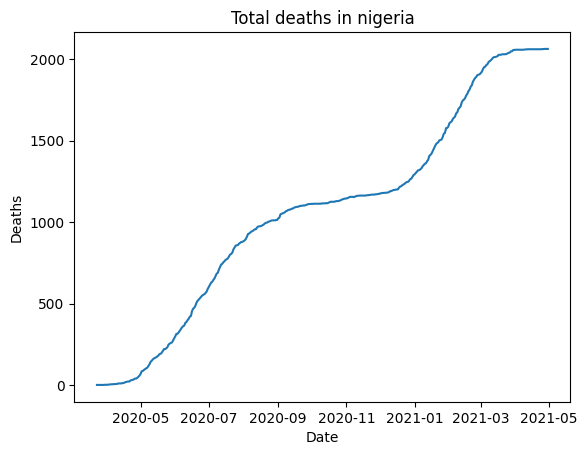

In [32]:
#Total deaths in nigeria
total_nig_death=df2[['date','total_deaths','location']].query('location == "Nigeria"')
sns.lineplot(data=total_nig_death, y='total_deaths', x='date')
plt.title('Total deaths in nigeria')
plt.ylabel('Deaths')
plt.xlabel('Date')
plt.style.use('petroff10')
plt.show()

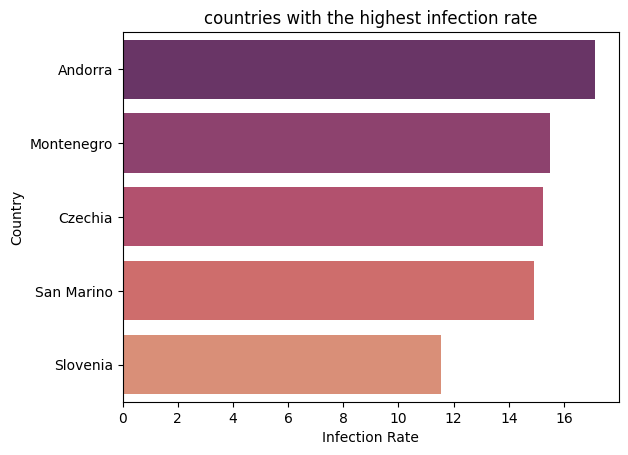

In [33]:
#looking at countries with the highest infection rate compared to population
loc_grp_chart=loc_grp[['total_cases','infection_rate']].max().sort_values(by='infection_rate',ascending=False).head()
sns.barplot(data=loc_grp_chart, y='location',x='infection_rate',palette='flare_r',hue='location',orient='h')
plt.title('countries with the highest infection rate')
plt.ylabel('Country')
plt.xlabel('Infection Rate')
plt.show()

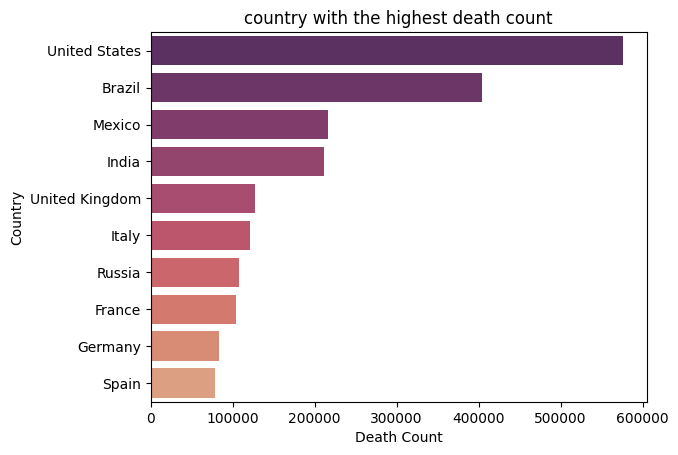

In [34]:
#country with the highest death count
sns.barplot(data=loc_grp['total_deaths'].agg(['mean','max']).sort_values(ascending=False, by='max')
            .head(10), y='location',x='max',palette='flare_r',hue='location')
plt.title('country with the highest death count')
plt.ylabel('Country')
plt.xlabel('Death Count')
plt.show()

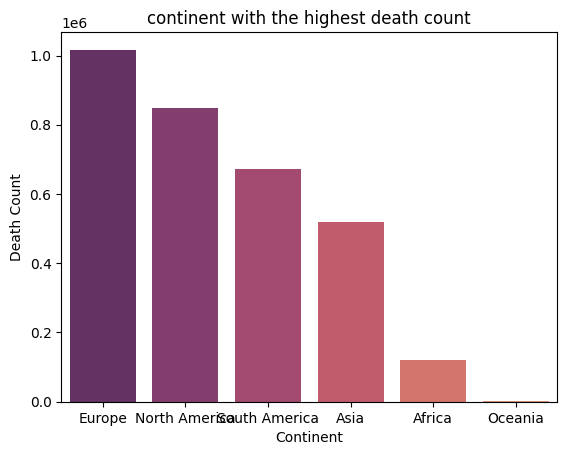

In [35]:
#continent with the highest death count
sns.barplot(data=max_loc_pop.groupby('continent')['total_deaths'].agg(['sum','mean'])
            .sort_values(ascending=False, by='sum'),x='continent',y='sum',palette='flare_r',hue='continent')
plt.title('continent with the highest death count')
plt.xlabel('Continent')
plt.ylabel('Death Count')
plt.show()

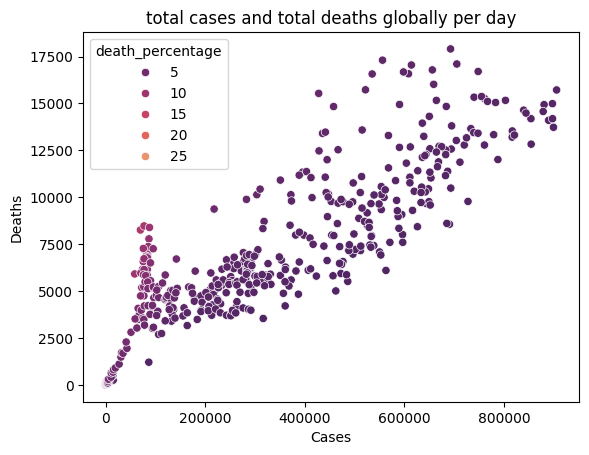

In [36]:
#total cases and total deaths globally per day
sns.scatterplot(data=global_df, x='new_cases',y='new_deaths',palette='flare_r',hue='death_percentage')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title('total cases and total deaths globally per day')
plt.show()